In [1]:
import numpy as np

### UKCP18 30 mins

In [61]:
ukcp18_30m_2001_2019 = []

season='jja'
resolution = "2.2km_bng_masked" #"2.2km_bng_masked" "2.2km_bng_regridded_12km_masked" 

for em in ['bc005','bc006' ,'bc007', 'bc009', 'bc010', 'bc011', 'bc012', "bc013", "bc015", "bc016", "bc018"]: #bc017
    # datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/{resolution}/2002_2020/{em}_{season}/'
    filename = f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/{em}_jja_gaugelocs_2km.npy'
    # Read in data
    this_em = np.load(filename)

    # Full data
    ukcp18_30m_2001_2019 = np.append(ukcp18_30m_2001_2019, this_em)

ukcp18_30m_2001_2019 = ukcp18_30m_2001_2019.astype(np.float32)
# np.save(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/all_ems_jja_gaugelocs_2km.npy',
#        ukcp18_hrly_2001_2019)

### UKCP18 hourly
Data is already just summer

In [62]:
ukcp18_hrly_2001_2019 = []

season='jja'
resolution = "2.2km_bng_masked" #"2.2km_bng_masked" "2.2km_bng_regridded_12km_masked" 

for em in ['01','04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']:
    print(em)
    # datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/{resolution}/2002_2020/{em}_{season}/'
    filename = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km_bng_masked/2002_2020/{em}_jja_gaugelocs_2km.npy'
    # Read in data
    this_em = np.load(filename)
    print(len(this_em))

    # Full data
    ukcp18_hrly_2001_2019 = np.append(ukcp18_hrly_2001_2019, this_em)

ukcp18_hrly_2001_2019 = ukcp18_hrly_2001_2019.astype(np.float32)
np.save(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/all_ems_jja_gaugelocs_2km.npy',
       ukcp18_hrly_2001_2019)

### CEH-GEAR

In [19]:
# datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/{resolution}/2002_2020/{em}_{season}/'
filename = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/CEH-GEAR/2.2km_regridded/AreaWeighted/jja_gaugelocs_2km.npy'
# Read in data
ceh_gear = np.load(filename)

### NIMROD

In [20]:
filename = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/NIMROD/30mins/NIMROD_regridded_2.2km/jja_gaugelocs_2km.npy'
nimrod = np.load(filename)

# Plotting

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):

    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]


def plot_ccdf(axs,results,colors):
    for num, result in enumerate(results):
        axs.scatter(result[3], result[1] ,linewidth = 1,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = 1, color = colors[num])
        
# Function to filter patches based on included colors
def create_patches(included_colors):
    return [mpatches.Patch(color=color, label=label) 
            for color, label in labels_and_colors if color in included_colors] 

def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NaN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Ensure last bin includes all values >= 35 mm
    bins_i_want = np.append(bins_i_want, [np.inf])  # Add an "infinity" bin

    # Compute histogram
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)

    # Compute cumulative distribution function (CDF)
    cdf = np.cumsum(hist * np.diff(bin_edges))

    # Compute complementary cumulative distribution function (CCDF)
    ccdf = 1 - cdf

    # Find bin centers (for plotting)
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # **Manually adjust the final bin center to be 35 mm**
    bin_centres[-1] = 35  # Last bin center is now fixed at 35 mm

    return cdf, ccdf, bin_centres, bin_edges[1:]


labels_and_colors = [
    ('black', 'CEH-GEAR (Hourly)'),
    ('darkorange', 'UKCP18 (Hourly)'),
    ('purple', 'UKCP18 (30 mins)'),
    ('green', 'NIMROD (30 mins)')]

In [69]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 30]

In [74]:
ukcp18_hrly_results = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2019,bins_i_want)
ukcp18_30m_results = calculate_ccdf_wetvalues(ukcp18_30m_2001_2019, bins_i_want)
NIMROD_results = calculate_ccdf_wetvalues(nimrod,bins_i_want)
cehgear_results  = calculate_ccdf_wetvalues(ceh_gear, bins_i_want)

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply


Text(0.5, 0, 'Intensity (mm/hr))')

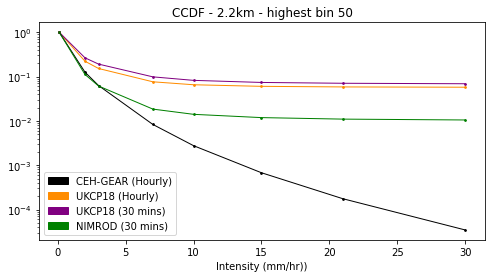

In [75]:
fig, axs = plt.subplots(figsize=(8,4))

results = [ukcp18_hrly_results, ukcp18_30m_results,
           cehgear_results, NIMROD_results]
colors = ['darkorange', 'purple',  'black',  'green']
plot_ccdf(axs,results, colors)

axs.set_yscale('log')
axs.set_title('CCDF - 2.2km - highest bin 50')
patches = create_patches(['black', 'purple', 'darkorange', 'green'])
axs.legend(handles=patches);
axs.set_xlabel('Intensity (mm/hr))')
